# Overview Materi

Jelaskan secara singkat perbedaan antara bagging dan boosting menurut pemahamanmu!

BAGGING (Bootstrap Aggregating):
- Membuat beberapa model secara paralel dengan dataset bootstrap (sampling dengan replacement)
- Setiap model dilatih secara independen
- Menggabungkan hasil dengan voting (classification) atau averaging (regression)
- Contoh: Random Forest
- Mengurangi variance tanpa meningkatkan bias

BOOSTING:
- Membuat model secara sequential, dimana model berikutnya belajar dari kesalahan model sebelumnya
- Memberikan bobot lebih pada data yang salah prediksi di iterasi sebelumnya
- Menggabungkan model weak learner menjadi strong learner
- Contoh: AdaBoost, Gradient Boosting
- Mengurangi bias dan variance

# Import Data & Libraries

In [1]:
# import semua libraries yang akan dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from collections import Counter

In [3]:
# import data dari datasets.load_breast_cancer
data = load_breast_cancer()

# subsetting data
X = data.data
y = data.target

# split data dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# ubah data ke dalam bentuk dataframe agar bisa ditampilkan dalam .head()
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
print(df.head())
print(f"\nData shape: {X.shape}")
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

# Bagging from Scratch

## Random Forest Classifier - Sklearn

In [7]:
clf = RandomForestClassifier(n_estimators=100, random_state=42) # gunakan RandomForestClassifier dari Sklearn
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

# print score menggunakan metrik accuracy
accuracy_sklearn = accuracy_score(y_test, preds)
print(f"Sklearn Random Forest Accuracy: {accuracy_sklearn:.4f}")

Sklearn Random Forest Accuracy: 0.9649


## Random Forest from Scratch
Source: https://www.youtube.com/watch?v=kFwe2ZZU7yw

In [9]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None, random_state=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_feature = n_feature
        self.trees = []
        self.random_state = random_state

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                max_features=self.n_feature
            )

            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]

    def _most_common_label(self, y):
        return np.bincount(y).argmax()

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])

        return predictions

## Predict Using Random Forest

In [11]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

clf = RandomForest(n_trees=100, max_depth=10, random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# print score menggunakan metrik accuracy
accuracy_custom = accuracy(y_test, predictions)
print(f"Custom Random Forest Accuracy: {accuracy_custom:.4f}")

Custom Random Forest Accuracy: 0.9561


# Boosting From Scratch

## Gradient Boosting Classifier - Sklearn

In [12]:
# define and train the model using GradientBoostingClassifier from Sklearn
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

preds = gb_clf.predict(X_test)

# print score menggunakan metrik accuracy
accuracy_gb_sklearn = accuracy_score(y_test, preds)
print(f"Sklearn Gradient Boosting Accuracy: {accuracy_gb_sklearn:.4f}")

Sklearn Gradient Boosting Accuracy: 0.9561


## Gradient Boosting from Scratch with Decision Tree
Source: https://www.youtube.com/watch?v=Pq2mmJxjs1o

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class gradientBoostingClassifier:
    def __init__(self, lr=0.1, n_estimators=25, base_learner=DecisionTreeRegressor):
        self.lr = lr
        self.n_estimators = n_estimators
        self.base_learner = base_learner
        self.base_models = []

    def fit(self, X, y, **params):
        self.base_models = []

        Fm = np.zeros_like(y, dtype=float)

        _, axs = plt.subplots(5, 5, figsize=(10, 10))
        axs = axs.flatten()

        for i in range(self.n_estimators):
            r_i = y - sigmoid(Fm)
            h_i = self.base_learner(**params)
            h_i.fit(X, r_i)
            self.base_models.append(h_i)

            # update the model
            Fm += self.lr * h_i.predict(X)

            # Plotting
            if i < 25:
                axs[i].plot(y, 'o', label='Actual', alpha=0.7)
                axs[i].plot(sigmoid(Fm), 'o', label='Predicted', alpha=0.7)
                axs[i].set_title(f'Iteration {i+1}')
                axs[i].legend()

        plt.tight_layout()
        plt.show()

    def predict(self, X):
        Fm = np.zeros(X.shape[0])
        for h_i in self.base_models:
            Fm += self.lr * h_i.predict(X)

        probs = sigmoid(Fm)

        return (probs >= 0.5).astype(int)


## Predict Using Gradient Boosting

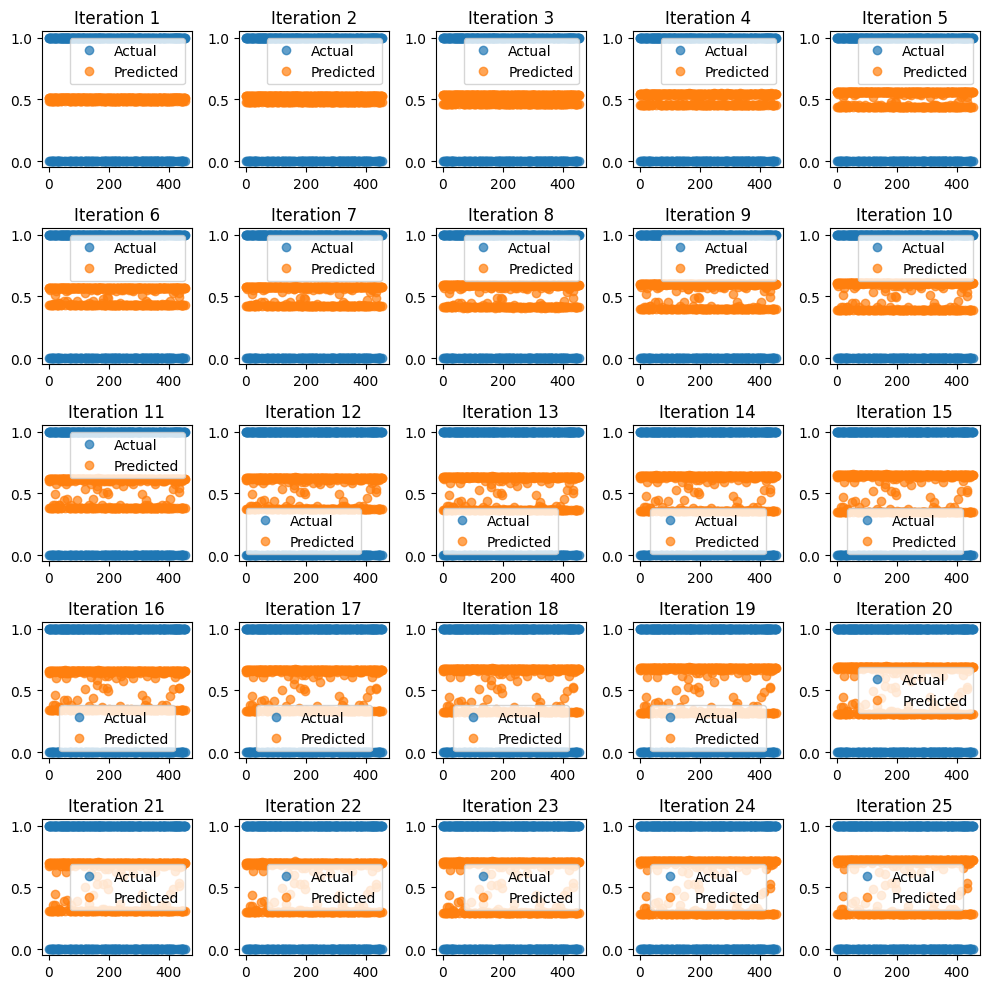

In [14]:
# define and train the model
gb_custom = gradientBoostingClassifier(lr=0.1, n_estimators=100)
gb_custom.fit(X_train, y_train, max_depth=3, random_state=42)

In [15]:
# get predictions:
preds = gb_custom.predict(X_test)

# print score menggunakan metrik accuracy
accuracy_gb_custom = accuracy_score(y_test, preds)
print(f"Custom Gradient Boosting Accuracy: {accuracy_gb_custom:.4f}")

Custom Gradient Boosting Accuracy: 0.9561


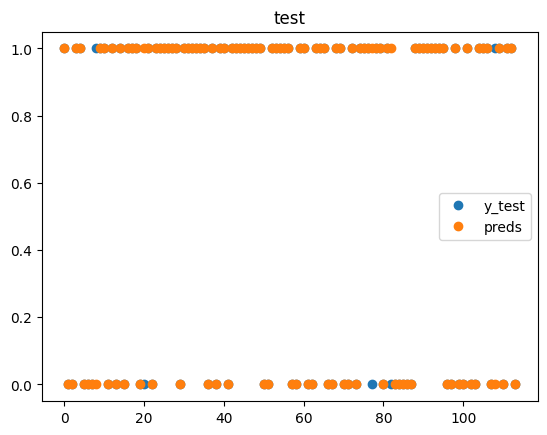

In [16]:
# plot predictions vs. the ground truth:
_, ax = plt.subplots(1, 1)
plt.title('test')
ax.plot(y_test, 'o', label = 'y_test')
ax.plot(preds, 'o', label = 'preds')
ax.legend()
plt.show()